# Visualize the whole slide with the final annotations

In [1]:
import spatialdata
import spatialdata_plot
import gc

In [2]:
# CHOOSE THE SLIDE ID
slide_id = "skin_s2"

In [3]:
# Open sdata
sdata = spatialdata.read_zarr(f"/Volumes/DD1_FGS/MICS/data_HE2CellType/CT_DS/sdata_final/sdata_{slide_id}.zarr", selection=('tables', 'shapes'))

In [4]:
# Clear memory
for table_name in ['features_cellvit', 'features_phikonv2', 'features_vit_google', 'table_combined', 'table_nuclei', 'table_scvi']:
    del sdata.tables[table_name]
    gc.collect()
print(sdata)

SpatialData object, with associated Zarr store: /Volumes/DD1_FGS/MICS/data_HE2CellType/CT_DS/sdata_final/sdata_skin_s2.zarr
├── Shapes
│     ├── 'cell_boundaries': GeoDataFrame shape: (87499, 1) (2D shapes)
│     ├── 'he_patches': GeoDataFrame shape: (26216, 7) (2D shapes)
│     └── 'nucleus_boundaries': GeoDataFrame shape: (87499, 1) (2D shapes)
└── Tables
      └── 'table_cells': AnnData (87499, 382)
with coordinate systems:
    ▸ '_13931763680_intrinsic', with elements:
        he_patches (Shapes)
    ▸ 'global', with elements:
        cell_boundaries (Shapes), he_patches (Shapes), nucleus_boundaries (Shapes)
with the following elements in the Zarr store but not in the SpatialData object:
    ▸ st (Points)
    ▸ morpho (Images)
    ▸ table_scvi (Tables)
    ▸ features_phikonv2 (Tables)
    ▸ he (Images)
    ▸ features_vit_google (Tables)
    ▸ table_combined (Tables)
    ▸ table_nuclei (Tables)
    ▸ features_cellvit (Tables)


In [5]:
# Add 'final_label' that is in 'table_cells' into shapes['cell_boundaries'] using 'cell_id'
id2label = dict(zip(sdata.tables['table_cells'].obs['cell_id'], sdata.tables['table_cells'].obs['final_label']))
sdata.shapes['cell_boundaries']['final_label'] = sdata.shapes['cell_boundaries'].index.map(id2label)
sdata.shapes['cell_boundaries']

,geometry,final_label
cell_id,,
aaaaaaaa-1,"POLYGON ((836.4 700.188, 827.9 702.1, 833 711....",Myeloid
aaaaaaab-1,"POLYGON ((833.85 625.6, 828.75 629.425, 828.11...",T_NK
aaaaaaac-1,"POLYGON ((844.9 628.788, 844.475 629.425, 843....",T_NK
aaaaaaad-1,"POLYGON ((827.9 630.487, 824.288 632.188, 824....",T_NK
aaaaaaae-1,"POLYGON ((833.425 634.95, 833 639.2, 832.363 6...",T_NK
...,...,...
aaabffmg-1,"POLYGON ((5899.425 1808.8, 5896.238 1810.5, 58...",Epithelial
aaabffmh-1,"POLYGON ((5899.638 1800.088, 5898.575 1800.725...",Epithelial
aaabffmi-1,"POLYGON ((5898.788 1737.188, 5889.013 1739.95,...",Fibroblast_Myofibroblast


In [6]:
# Clear memory
del sdata.tables['table_cells']
del sdata.shapes['nucleus_boundaries']
del sdata.shapes['he_patches']
gc.collect()
sdata

SpatialData object, with associated Zarr store: /Volumes/DD1_FGS/MICS/data_HE2CellType/CT_DS/sdata_final/sdata_skin_s2.zarr
└── Shapes
      └── 'cell_boundaries': GeoDataFrame shape: (87499, 2) (2D shapes)
with coordinate systems:
    ▸ 'global', with elements:
        cell_boundaries (Shapes)
with the following elements in the Zarr store but not in the SpatialData object:
    ▸ st (Points)
    ▸ morpho (Images)
    ▸ he_patches (Shapes)
    ▸ features_phikonv2 (Tables)
    ▸ table_scvi (Tables)
    ▸ he (Images)
    ▸ features_vit_google (Tables)
    ▸ table_combined (Tables)
    ▸ table_nuclei (Tables)
    ▸ table_cells (Tables)
    ▸ features_cellvit (Tables)
    ▸ nucleus_boundaries (Shapes)

In [7]:
# Map each final_label to a number
sdata.shapes['cell_boundaries']['final_label_num'] = sdata.shapes['cell_boundaries']['final_label'].astype('category').cat.codes
sdata.shapes['cell_boundaries'].head()

,geometry,final_label,final_label_num
cell_id,,,
aaaaaaaa-1,"POLYGON ((836.4 700.188, 827.9 702.1, 833 711....",Myeloid,5
aaaaaaab-1,"POLYGON ((833.85 625.6, 828.75 629.425, 828.11...",T_NK,6
aaaaaaac-1,"POLYGON ((844.9 628.788, 844.475 629.425, 843....",T_NK,6
aaaaaaad-1,"POLYGON ((827.9 630.487, 824.288 632.188, 824....",T_NK,6
aaaaaaae-1,"POLYGON ((833.425 634.95, 833 639.2, 832.363 6...",T_NK,6


In [8]:
# Print legend (which number corresponds to which label)
print("Label: Number")
for label, num in zip(sdata.shapes['cell_boundaries']['final_label'].unique(), sdata.shapes['cell_boundaries']['final_label_num'].unique()):
    print(f"{label}: {num}")

Label: Number
Myeloid: 5
T_NK: 6
Fibroblast_Myofibroblast: 2
Epithelial: 1
Blood_vessel: 0
Melanocyte: 4
Less10: 3


In [9]:
# Put the final labels num as categories
sdata.shapes['cell_boundaries']['final_label_num'] = sdata.shapes['cell_boundaries']['final_label_num'].astype('category')

INFO     Using 'datashader' as plotting backend.                                                                   


/Users/felicie-giraud-sauveur/miniforge3/envs/cluster/lib/python3.10/site-packages/spatialdata_plot/pl/utils.py:786: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = color_source_vector.map(color_mapping)


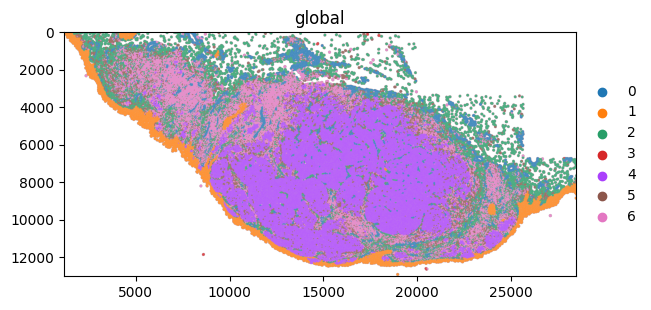

In [10]:
sdata.pl.render_shapes(
    "cell_boundaries", color="final_label_num"
).pl.show("global")